<a href="https://colab.research.google.com/github/istiak777-Pro/Registration-form-/blob/main/vgg16mmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow.keras.models import load_model


In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!cp -r /MyDrive/train/Traffic_Dataset /content/


cp: cannot stat '/MyDrive/train/Traffic_Dataset': No such file or directory


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!ls /content/drive/MyDrive/


'Attendance (1).gsheet'				        Saymon
 Attendance.gsheet				        Schedule.gsheet
 Classroom					        Screenshot_2023-10-06-13-08-43-78.jpg
'Colab Notebooks'				       'SDK video'
'Dazzle Packages.gsite'				       'Sultan Dine.jpg'
 E_Passport_BD_2.psd				       'Sultan’s dine '
'Financial scenario.docx'			       'Sultan’s Dine'
'Financial scenario.gdoc'			        Train
'KGGC nobin boron'				        Untitled0.ipynb
'Passport - Istiak '				       'Untitled folder'
 Portfolio.gsite				       'Untitled spreadsheet (1).gsheet'
 Prism.pdf					       'Untitled spreadsheet.gsheet'
'RE_Dealership_Profile(bangla'\'')- Khulna City.docx'   video
 Restaurant.gsite				        vpn
'Saved from Chrome'				        wedding


In [8]:
!ls /content/drive/MyDrive/train/


ls: cannot access '/content/drive/MyDrive/train/': No such file or directory


In [9]:
!ls /content/drive/MyDrive/


'Attendance (1).gsheet'				        Saymon
 Attendance.gsheet				        Schedule.gsheet
 Classroom					        Screenshot_2023-10-06-13-08-43-78.jpg
'Colab Notebooks'				       'SDK video'
 Content					       'Sultan Dine.jpg'
'Dazzle Packages.gsite'				       'Sultan’s dine '
 E_Passport_BD_2.psd				       'Sultan’s Dine'
'Financial scenario.docx'			        Train
'Financial scenario.gdoc'			        Untitled0.ipynb
'KGGC nobin boron'				       'Untitled folder'
'Passport - Istiak '				       'Untitled spreadsheet (1).gsheet'
 Portfolio.gsite				       'Untitled spreadsheet.gsheet'
 Prism.pdf					        video
'RE_Dealership_Profile(bangla'\'')- Khulna City.docx'   vpn
 Restaurant.gsite				        wedding
'Saved from Chrome'


In [10]:
/content/drive/MyDrive/
└── content/
    └── train/
        └── Traffic_Dataset/
            ├── train/
            │   ├── JAM/
            │   └── NOT_JAM/
            └── test/
                ├── JAM/
                └── NOT_JAM/


SyntaxError: invalid character '└' (U+2514) (<ipython-input-10-d3050d8c9f0e>, line 2)

In [11]:
/content/drive/MyDrive/content/train/Traffic_Dataset/


NameError: name 'content' is not defined

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!ls /MyDrive/content/


ls: cannot access '/MyDrive/content/': No such file or directory


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls /content/drive/MyDrive/


'Attendance (1).gsheet'				       'Saved from Chrome'
 Attendance.gsheet				        Saymon
 Classroom					        Schedule.gsheet
'Colab Notebooks'				        Screenshot_2023-10-06-13-08-43-78.jpg
 Content					       'SDK video'
'Dazzle Packages.gsite'				       'Sultan Dine.jpg'
 E_Passport_BD_2.psd				       'Sultan’s dine '
'Financial scenario.docx'			       'Sultan’s Dine'
'Financial scenario.gdoc'			        Untitled0.ipynb
'KGGC nobin boron'				       'Untitled folder'
'Passport - Istiak '				       'Untitled spreadsheet (1).gsheet'
 Portfolio.gsite				       'Untitled spreadsheet.gsheet'
 Prism.pdf					        video
'RE_Dealership_Profile(bangla'\'')- Khulna City.docx'   vpn
 Restaurant.gsite				        wedding


In [17]:
!find /content/drive/MyDrive/ -type d -name "train"


/content/drive/MyDrive/Content/Train/Traffic_Dataset/train


In [18]:
!cp -r /content/drive/MyDrive/Content/Train/Traffic_Dataset /content/


In [19]:
!ls /content/Traffic_Dataset/


test  train


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam


In [22]:
train_dir = '/content/Traffic_Dataset/train'
test_dir = '/content/Traffic_Dataset/test'

# Define image size
img_size = (224, 224)

# Set up ImageDataGenerators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale images to [0,1]
    rotation_range=20,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Randomly shear images
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill pixels after transformations
)

# Set up ImageDataGenerator for testing (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'  # Since we have two classes: JAM and NOT_JAM
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)


Found 408 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base VGG16 model layers


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
model = models.Sequential([
    base_model,  # Add the VGG16 base model
    layers.Flatten(),                  # Flatten the 3D output to 1D
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),               # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Final output layer with sigmoid activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 340s 28s/step - accuracy: 0.6827 - loss: 0.5355 - val_accuracy: 0.9792 - val_loss: 0.0923
Epoch 2/10
 1/12 ━━━━━━━━━━━━━━━━━━━━ 3:53 21s/step - accuracy: 0.8438 - loss: 0.3329

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 6s/step - accuracy: 0.8438 - loss: 0.3329 - val_accuracy: 0.9896 - val_loss: 0.0793
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 366s 29s/step - accuracy: 0.9334 - loss: 0.1689 - val_accuracy: 0.9896 - val_loss: 0.0517
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 101s 7s/step - accuracy: 0.9688 - loss: 0.1296 - val_accuracy: 0.9896 - val_loss: 0.0482
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 323s 27s/step - accuracy: 0.9373 - loss: 0.1418 - val_accuracy: 0.9896 - val_loss: 0.0586
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 92s 7s/step - accuracy: 0.9688 - loss: 0.1009 - val_accuracy: 0.9896 - val_loss: 0.0571
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 321s 27s/step - accuracy: 0.9429 - loss: 0.1389 - val_accuracy: 0.9896 - val_loss: 0.0470
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.9688 - loss: 0.1073 - val_accuracy: 0.9896 - val_loss: 0.0527
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 323s 28s/step - accuracy: 0.9781 - loss: 0.0802 - val_accuracy: 0.9688 - val_loss: 0

In [26]:
print("Train samples:", train_generator.samples)
print("Batch size:", train_generator.batch_size)


Train samples: 408
Batch size: 32


In [27]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 348s 27s/step - accuracy: 0.9696 - loss: 0.0852 - val_accuracy: 0.9896 - val_loss: 0.0404
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 377s 27s/step - accuracy: 0.9843 - loss: 0.0654 - val_accuracy: 0.9896 - val_loss: 0.0410
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 343s 27s/step - accuracy: 0.9760 - loss: 0.0583 - val_accuracy: 0.9896 - val_loss: 0.0370
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 363s 28s/step - accuracy: 0.9764 - loss: 0.0747 - val_accuracy: 0.9896 - val_loss: 0.0367
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 358s 28s/step - accuracy: 0.9904 - loss: 0.0453 - val_accuracy: 0.9896 - val_loss: 0.0450
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 343s 27s/step - accuracy: 0.9900 - loss: 0.0377 - val_accuracy: 0.9896 - val_loss: 0.0366
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 343s 27s/step - accuracy: 0.9908 - loss: 0.0324 - val_accuracy: 0.9792 - val_loss: 0.0520
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 341s 27s/step - accuracy: 0.9954 - loss: 0.0298 - val_accuracy: 0.

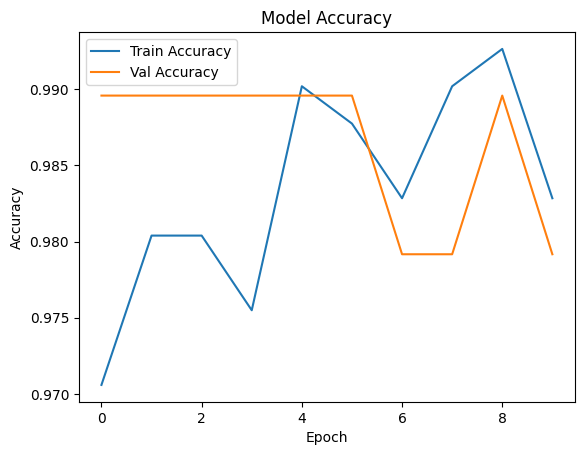

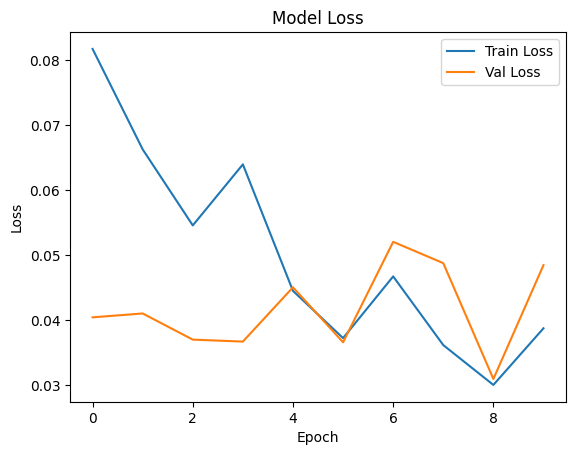

In [28]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
model.save('/content/traffic_jam_vgg16.h5')


In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


In [32]:
jam_folder = '/content/Traffic_Dataset/train/JAM'
not_jam_folder = '/content/Traffic_Dataset/train/NOT_JAM'


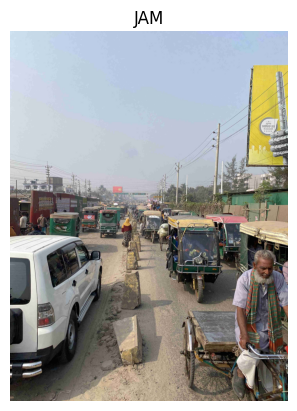

In [33]:
img_name = random.choice(os.listdir(jam_folder))
img_path = os.path.join(jam_folder, img_name)

img = mpimg.imread(img_path)
plt.imshow(img)
plt.title("JAM")
plt.axis('off')
plt.show()


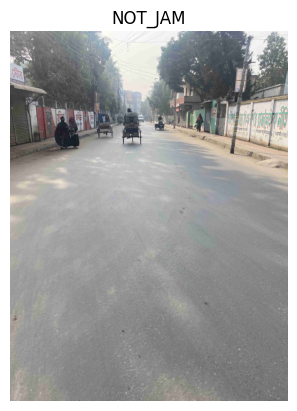

In [34]:
img_name = random.choice(os.listdir(not_jam_folder))
img_path = os.path.join(not_jam_folder, img_name)

img = mpimg.imread(img_path)
plt.imshow(img)
plt.title("NOT_JAM")
plt.axis('off')
plt.show()


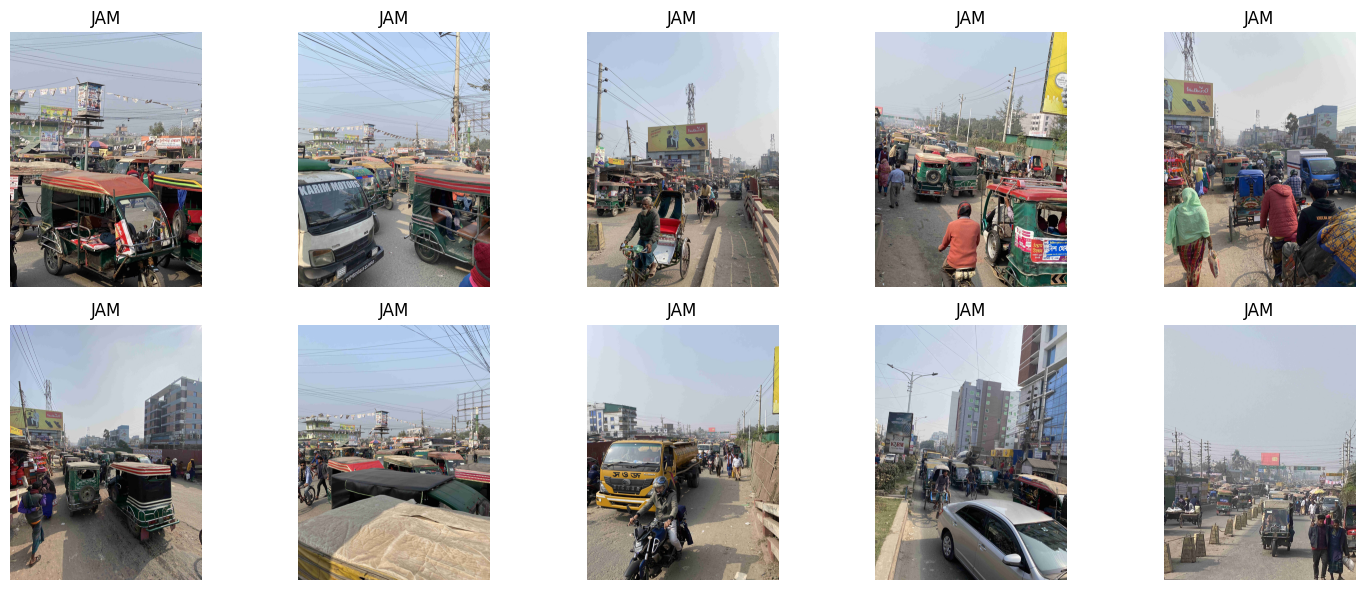

In [35]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 images
jam_images = random.sample(os.listdir(jam_folder), 10)

for i, img_name in enumerate(jam_images):
    img_path = os.path.join(jam_folder, img_name)
    img = mpimg.imread(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title("JAM")
    ax.axis('off')

plt.tight_layout()
plt.show()


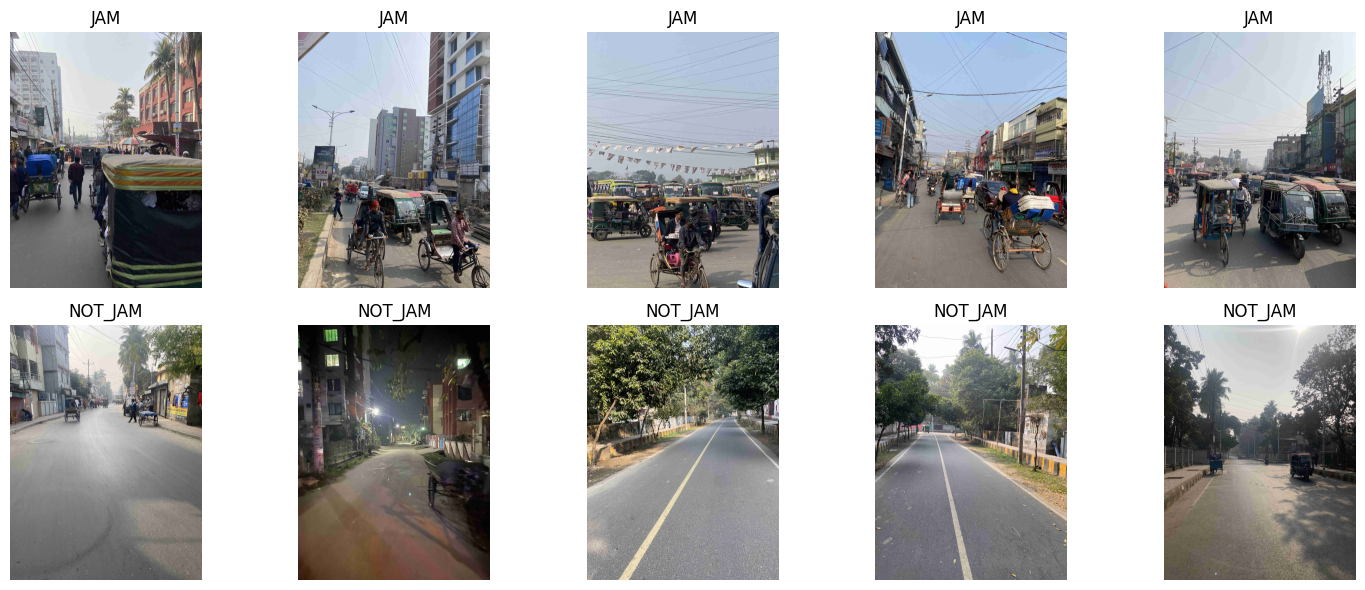

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Set your image folder paths
jam_folder = '/content/Traffic_Dataset/train/JAM'
not_jam_folder = '/content/Traffic_Dataset/train/NOT_JAM'

# Get random image filenames
jam_images = random.sample(os.listdir(jam_folder), 5)
not_jam_images = random.sample(os.listdir(not_jam_folder), 5)

# Plot
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Top row: JAM
for i, img_name in enumerate(jam_images):
    img_path = os.path.join(jam_folder, img_name)
    img = mpimg.imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].set_title("JAM")
    axes[0, i].axis('off')

# Bottom row: NOT_JAM
for i, img_name in enumerate(not_jam_images):
    img_path = os.path.join(not_jam_folder, img_name)
    img = mpimg.imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].set_title("NOT_JAM")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load VGG16 base
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (JAM or NOT_JAM)

model = Model(inputs=vgg.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
# Use ImageDataGenerator to load images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Traffic_Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Traffic_Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


Found 408 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 344s 27s/step - accuracy: 0.8688 - loss: 0.4006 - val_accuracy: 0.9583 - val_loss: 0.1187
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 337s 26s/step - accuracy: 0.9898 - loss: 0.0574 - val_accuracy: 0.9896 - val_loss: 0.0387
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 338s 26s/step - accuracy: 0.9948 - loss: 0.0271 - val_accuracy: 0.9896 - val_loss: 0.0317
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 339s 26s/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.9792 - val_loss: 0.0400
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 399s 28s/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9896 - val_loss: 0.0310
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 336s 26s/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9896 - val_loss: 0.0281
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 343s 27s/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9792 - val_loss: 0.0327
Epoch 8/10
13/13 ━━━━━━

In [39]:
model.save('/content/traffic_jam_vgg16.h5')


In [40]:
model = load_model('/content/traffic_jam_vgg16.h5')


NameError: name 'load_model' is not defined

In [43]:
model = load_model('/content/traffic_jam_vgg16.h5')


Saving jam51.JPG to jam51.JPG


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
Predicted: JAM 🚦


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


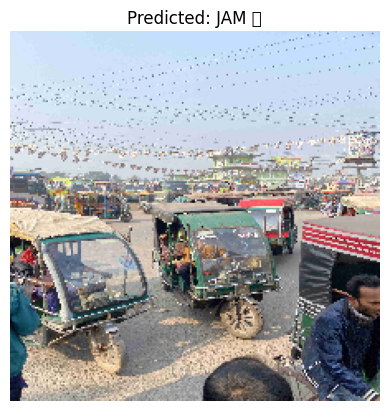

In [44]:
# STEP 1: Imports
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# STEP 2: Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# STEP 3: Preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# STEP 4: Load your trained model
model = load_model('/content/traffic_jam_vgg16.h5')

# STEP 5: Predict
prediction = model.predict(img_array)

# STEP 6: Display result
plt.imshow(img)
plt.axis('off')
if prediction[0][0] >= 0.5:
    plt.title("Predicted: NOT_JAM 🚘")
    print("Predicted: NOT_JAM 🚘")
else:
    plt.title("Predicted: JAM 🚦")
    print("Predicted: JAM 🚦")
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
